In [7]:
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(np.array([1, 2, 3]))

[1 2 3]


In [10]:
def f(x):
    return 3*x**2 - 4*x + 5
    

In [11]:
f(-5)

100

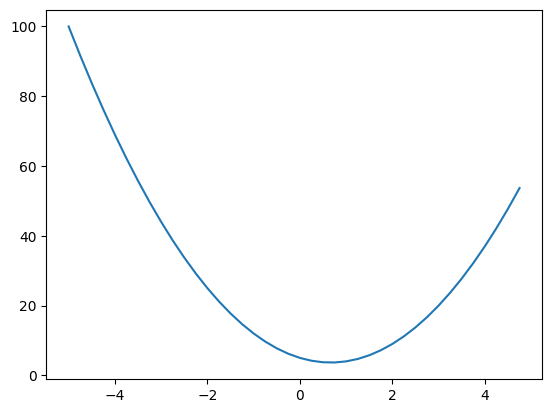

In [12]:
xs=np.arange(-5, 5, 0.25)
ys=f(xs)
plt.plot(xs, ys)

In [27]:
h=0.0000001
x=2/3
f(x)


3.666666666666667

In [28]:
(f(x+h)-f(x))/h

2.9753977059954195e-07

In [29]:
a=2.0
b=-3.0
c=10.0
d=a*b + c
print(d)

4.0


In [30]:
h=0.0001
a=2.0
b=-3.0
c=10.0
d1=a*b + c
c+=h
d2=a*b + c
print('d1', d1)
print('d2', d2)
print("slope", (d2-d1)/h)


d1 4.0
d2 4.0001
slope 0.9999999999976694


In [37]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data=data
        self.grad=0.0
        self._backward= lambda: None
        self._op=_op
        self._prev= set(_children)
        self.label=label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out=Value(self.data + other.data, (self, other), '+')
       
        def _backward():
            self.grad+=1.0* out.grad
            other.grad+= 1.0 * out.grad
        out._backward=_backward
        return out


    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out=Value(self.data* other.data, (self, other), '*')
        def _backward():
            self.grad+= other.data* out.grad
            other.grad+= self.data * out.grad
        out._backward=_backward
        return out

    def __rmul__(self, other):
        return self * other
    def tanh(self):
        x= self.data
        t= (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out= Value(t, (self, ),'tanh' )
        def _backward():
            self.grad += (1-t**2) * out.grad
        out._backward=_backward

        return out

    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad=1.0
        for node in reversed(topo):
            node._backward()
            
    

In [14]:

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [15]:
draw_dot(L)

NameError: name 'L' is not defined

In [34]:
a.data+=0.01* a.grad
b.data += 0.01*b.data
c.data+= 0.01*c.data
f.data+= 0.01 * f.data

e= a*b
d=e+ c
L=d*f
print(L.data)


AttributeError: 'float' object has no attribute 'data'

## initially the grad is 0 which means that the gradient of L wrt all the nodes i initially 0
## now we are doing backpropagation of all the nodes with respect to L


In [18]:

L=d*f
dL_dd=f

dd_dc =1.0
dd_de=1.0

#using chain rule we should find out dL/dc
#dL/dc= dL/dd  * dd/dc

dL_dc= f

# now we are finding the gradient of a and b using chain rule
de_da=b
dL_da=b*f
print(dL_da)

NameError: name 'd' is not defined

In [36]:
#initially the grad is 0 which means that the gradient of L wrt all the nodes i initially 0
#now we are doing backpropagation of all the nodes with respect to L

L=d*f
dL_dd=f

dd_dc =1.0
dd_de=1.0

#using chain rule we should find out dL/dc
#dL/dc= dL/dd  * dd/dc

dL_dc= f

# now we are finding the gradient of a and b using chain rule
de_da=b
dL_da=b*f
print(dL_da)

TypeError: unsupported operand type(s) for *: 'float' and 'function'

In [37]:
f.grad=4.0
d.grad=-2.0
L.grad=1.0
c.grad=-2.0
e.grad=-2.0
a.grad, b.grad= 6.0, -4.0

AttributeError: 'float' object has no attribute 'grad'

In [38]:
def lol():

    h=0.001
    a=Value(2.0, label="a")
    b=Value(-3.0, label="b")
    c=Value(10.0, label="c")
    e=a*b; e.label="e"
    d=e+c; d.label="d"
    f=Value(-2.0, label="f")
    L=d*f; L.label="L"
    L1=L.data

    a=Value(2.0, label="a")
    b=Value(-3.0, label="b")
    b.data+=h
    c=Value(10.0, label="c")
    
    e=a*b; e.label="e"
   
    d=e+c; d.label="d"
   
    f=Value(-2.0, label="f")

    L=d*f; L.label="L"
    L2=L.data


    print((L2-L1)/h)
lol()

-3.9999999999995595


In [39]:

plt.plot( np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

NameError: name 'plt' is not defined

In [40]:
# back propagating using a neuron

x1= Value( 2.0, label="x1")
x2=Value( 0.0, label="x2")

w1=Value(-3.0, label="w1")
w2=Value(1.0, label="w2")

b=Value(6.881373, label="b")
x1w1= x1* w1; x1w1.label="x1.w1"
x2w2= x2 * w2; x2w2.label=" x2.w2"
x1w1x2w2= x1w1 + x2w2 ; x1w1x2w2.label=" x1.w1 + x2.w2"
n= x1w1x2w2 + b;
n.label="n"
o= n.tanh() ;o.label="output"


In [41]:
# o.grad=1.0

In [42]:
# # we are now back propagating from the tanh function through all the nodes in the network
# # derivative of tanh is 1 - tanh^2

# do_dn = 1- o.data**2


# n.grad= do_dn
# print(n.grad)

In [43]:
# #now that we know the derivative of n wrt output o, lets calc all the oter derivatives as well
# # we can see that the derivatives of w1x1+w2x2 and b are represented as n= (w1x1+w2x2  )+  b
# # dL/db=dL/dn * dn/db
# #dL/db= 0.5 * (w1x1+w2x2)
# #dL/d(w1x1+w2x2)= 0.5*b
# b.grad=0.5 
# x1w1x2w2.grad= 0.5 
# print(b.grad)
# print(x1w1x2w2.grad)

In [44]:
# # now lets calculate the derivatives for, w1x1 and w2x2
# #by calculations we can know that
# #dL/d(w1x1) = 0.5
# #also
# #dL/d(w2x2) = 0.5

# x1w1.grad= 0.5 
# x2w2.grad= 0.5

In [45]:
# #now we are calcualting the derivatives for the first layer of the netowork
# x2.grad= x2w2.grad * w2.data
# w2.grad= x2w2.grad * x2.data
# x1.grad= x1w1.grad * w1.data
# w1.grad= x1w1.grad * x1.data

In [48]:
# draw_dot(o)

# ok so this was us implementing the back prop manually, now lets define a function in the class, such that the back prop takes on automatically

In [49]:
o.grad=1.0
o._backward()

In [50]:
n._backward()

In [51]:
x1w1x2w2._backward()


In [52]:
x1w1._backward()
x2w2._backward()

In [53]:
# calling the bcakward prop function directly from the class, which follows topological order
o.backward()

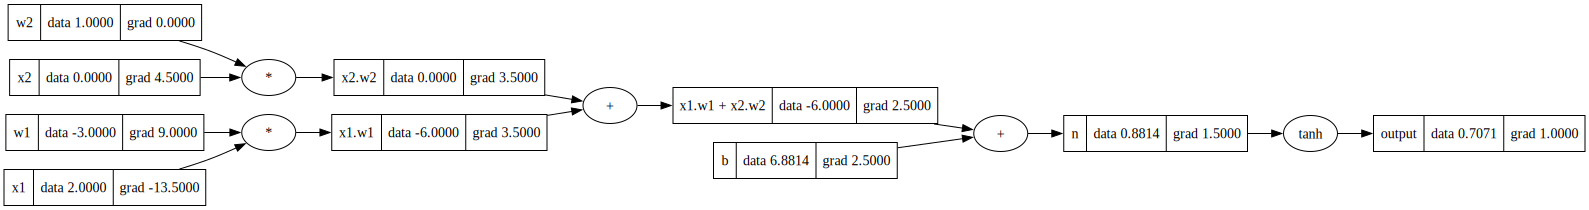

In [54]:
draw_dot(o)

In [55]:
#letsss goo


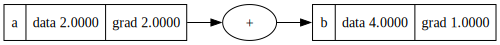

In [56]:
a=Value(2.0, label="a")
b= a + a
b.label="b"
b.backward()
draw_dot(b)

In [57]:
o.grad=1.0
o.backward()

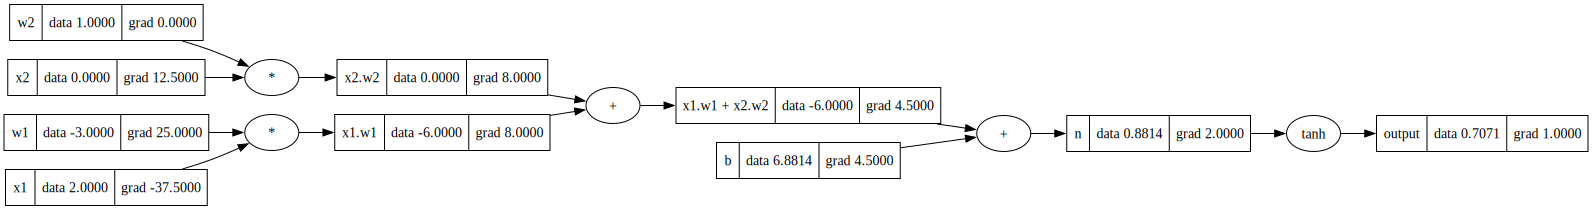

In [58]:
draw_dot(o)

In [1]:
#doiing the same but now using pytorch

In [19]:
import torch
import random

#

# building out a multi layer perceptron or neural network using pytorch
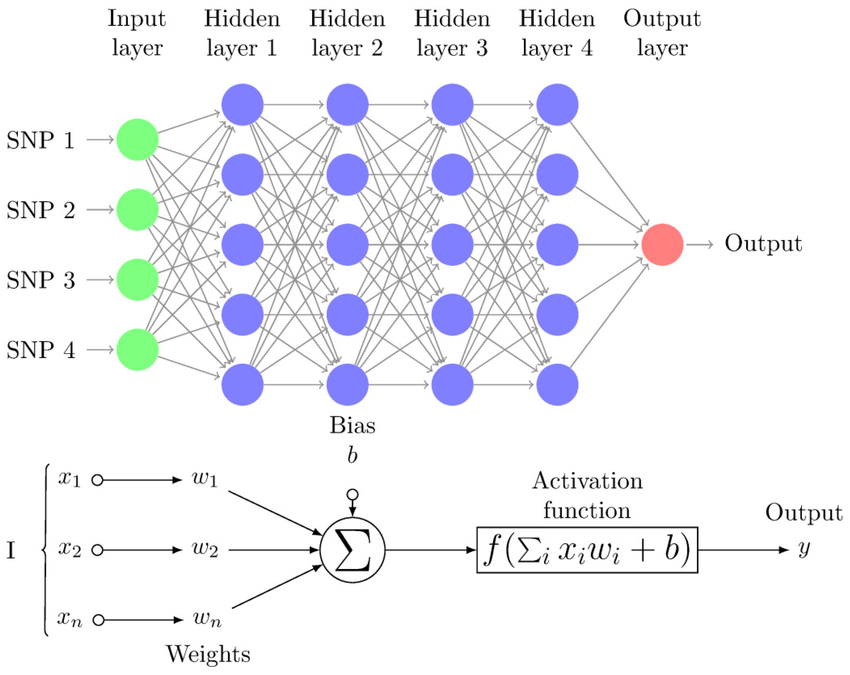

In [ ]:
class Neuron:
    def __init__(self, nin):
        self.w=[Value(random.uniform(-1,1)) for _ in range (nin)]
        self.b=Value(random.uniform(-1, 1))

    def __call__(self, x):
        
        
        act=sum(((wi*xi) for wi,xi in zip(self.w, x)), self.b)
        prediction=act.tanh()
        return prediction
    
class Layer:
        def __init__(self, nin, nout):
            self.neurons=[Neuron(nout) for _ in range(nout)]
        def __call__(self, x):
            out=[n(x) for n in self.neurons]
            return(out)

class MLP:
     def __init__(self, nin, nout):
          s
x=[1.0, 2.0]
n=Layer(2, 3)
n(x)


[Value(data=-0.6862303019810317),
 Value(data=-0.8458066513397577),
 Value(data=0.16845851370197035)]